In [87]:
# Normalize the data atrributes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [88]:
# Load the datasets
column_names = ["Population","Profit"]  
data = pd.read_csv('ex1data1.txt', names = column_names)

In [89]:
print('data shape: {}, column size: {}, row size: {}' \
      .format(data.shape, data.shape[0], data.shape[1]))

data shape: (97, 2), column size: 97, row size: 2


In [90]:
#Data Summary
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [91]:
# Correlation 
corr = data.corr()
corr.style.background_gradient(cmap='Spectral')

,Population,Profit
Population,1,0.837873
Profit,0.837873,1


In [92]:
# Covariance
cov = data.cov()
cov.style.background_gradient(cmap='Spectral')

,Population,Profit
Population,14.976,17.8669
Profit,17.8669,30.363


Text(0,0.5,'Profit in $10,000s')

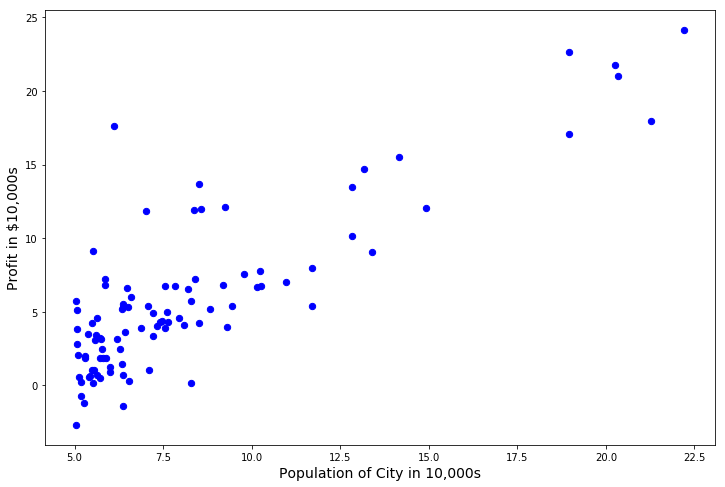

In [93]:
# scatterplot
data.plot(kind = 'scatter', x = 'Population', y = 'Profit',
          s= 40, color = 'blue', figsize=(12,8))

# labels
plt.xlabel('Population of City in 10,000s', fontsize = 14)
plt.ylabel('Profit in $10,000s', fontsize =14)

In [94]:
# input values - xs and 1s
nrows = data.shape[0]
ncols = data.shape[1]

x = data.loc[:, 'Population'].values #converts to Numpy array
x = x.reshape(nrows, 1)  # Alternatively x.reshape(-1,1)

In [95]:
x.shape

(97, 1)

In [96]:
# normalize the data attributes
normalized_x = preprocessing.normalize(x)

In [97]:
one_stack = np.ones((nrows,1))
x_stack = np.hstack((x, one_stack))

In [98]:
x_stack[:3]

array([[6.1101, 1.    ],
       [5.5277, 1.    ],
       [8.5186, 1.    ]])

In [128]:
# output variable
y = data.loc[:, 'Profit'].values # converts to Numpy array
y = y.reshape(nrows,1)

In [150]:
def train(x, y, iteration_, printevery_,alpha_):
    print_every = printevery_ 
    iteration = iteration_
    alpha = alpha_
    
    # Zero initialization of parameters 
    theta = [[0.5],[0.5]]
    
    # Here, want to save our cost function or loss or square error, 
    # so that we can have an idea of how the deviation of the hypothesis from the ground thruth reduces
    cost_function = np.zeros(iteration)
    
    for i in range(0, iteration):
        # Step 1: we make a prediction using the random weights (theta) that we initialized
        # @ is a fancy way do performing dot products
        h = x @ theta
        
        # Step 2: We take a step to correct the weights (theta) to that the next predicion will be better
        theta = update_weight(h, theta, x, alpha)
        
        # Step 3: We measure the deviation or error
        cost_function[i] = cost(x, theta)
        
        # Display result every 50 iterations
        if i % print_every  == 0:
            print("Iteration: {}, Cost function: {} ".format(i, cost_function[i]))
            

    return theta, cost_function

In [156]:
def cost(x, theta):
    m = nrows
    h = x @ theta
    return (1/(2 * m)) * np.sum(np.square(h - y))

In [157]:
def update_weight(h, theta, x, alpha):
    m = nrows
    alpha = alpha
    theta = theta - alpha * (1 / m * ( x.T @ (h - y)))
    return theta

In [158]:

theta, cost_values = train(x_stack,y,2500,50,0.01)

Iteration: 0, Cost function: 6.331084923480765 
Iteration: 50, Cost function: 5.957119560081572 
Iteration: 100, Cost function: 5.712773141061569 
Iteration: 150, Cost function: 5.5087640160564515 
Iteration: 200, Cost function: 5.338433207639953 
Iteration: 250, Cost function: 5.19622101838082 
Iteration: 300, Cost function: 5.077485559059671 
Iteration: 350, Cost function: 4.978351234683895 
Iteration: 400, Cost function: 4.895582242795294 
Iteration: 450, Cost function: 4.826476954981081 
Iteration: 500, Cost function: 4.768779734138858 
Iteration: 550, Cost function: 4.720607309159362 
Iteration: 600, Cost function: 4.680387303853546 
Iteration: 650, Cost function: 4.646806913672061 
Iteration: 700, Cost function: 4.618770054995222 
Iteration: 750, Cost function: 4.59536158832117 
Iteration: 800, Cost function: 4.575817447576082 
Iteration: 850, Cost function: 4.559499700549654 
Iteration: 900, Cost function: 4.5458757264138026 
Iteration: 950, Cost function: 4.534500830666628 
Ite

In [159]:
# Now, lets see our cost_values
cost_values

array([6.33108492, 6.24596258, 6.23711197, ..., 4.47718792, 4.47718714,
       4.47718636])

In [160]:
cost_values

array([6.33108492, 6.24596258, 6.23711197, ..., 4.47718792, 4.47718714,
       4.47718636])

In [161]:
# Now, lets see our trained weights
print('Our learned value of theta: ',theta.ravel())

Our learned value of theta:  [ 1.18815177 -3.84718606]


In [162]:
theta.shape

(2, 1)

In [163]:
theta.ravel().shape # Alternatively theta.squeeze().shape

(2,)

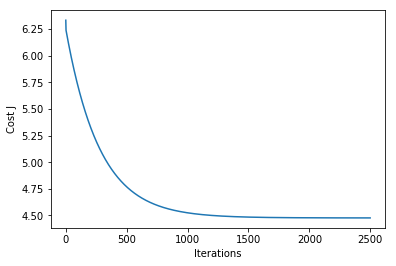

In [164]:
plt.plot(cost_values)
plt.ylabel('Cost J')
plt.xlabel('Iterations')
plt.show()

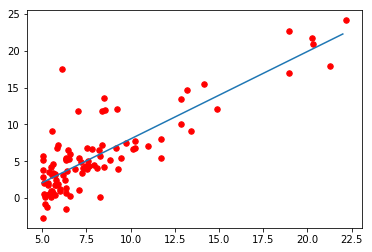

In [165]:
x_plot = np.arange(5,23)
y_plot = theta[0]*x_plot + theta[1]
# Plot gradient descent
plt.scatter(x[:,0], y, s=30, c='r', marker='o', linewidths=1)
plt.plot(x_plot,y_plot, label='Linear regression (Gradient descent)')

In [166]:
def predict():
    input_ = float(input('Enter the population size(10,000): '))
    print("For a population of {}, the estimated profit is ${}".format(input_, input_ * 1.2334223))

In [167]:
predict()

Enter the population size(10,000): 500
For a population of 500.0, the estimated profit is $616.71115
